In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

In [33]:
data = pd.read_csv('./kyphosis.csv')

In [34]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


# EDA

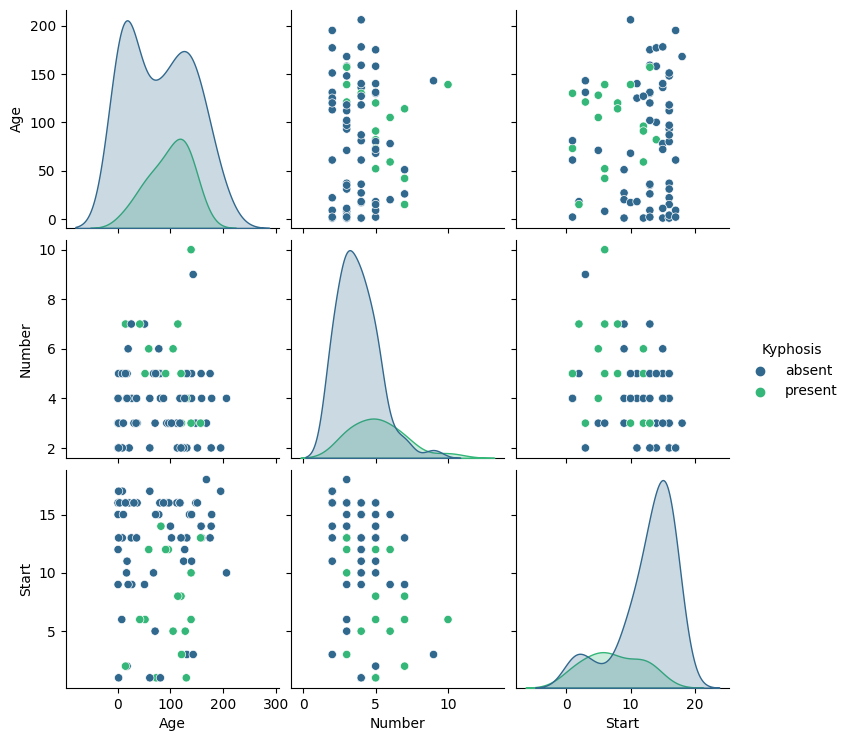

In [35]:
sns.pairplot(data, hue='Kyphosis' ,palette='viridis')

# Test Train split


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
data_x = data.drop('Kyphosis', axis=1)
data_y = data['Kyphosis']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=101)

# Decision Tree

### Train model using single decision tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model = DecisionTreeClassifier()

In [41]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
pred = model.predict(x_test)

In [43]:
predict = model.predict(np.array([[71,3,5]]))
print(predict)


['absent']


/home/jeel/Documents/kyphosis/env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



In [47]:
print(confusion_matrix(y_test,pred))

[[13  4]
 [ 6  2]]


In [48]:
#Store the model parameters using Pickle libraries

import pickle
pickle.dump(model, open('kyphosis_dt_model.pkl','wb'))